In [15]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

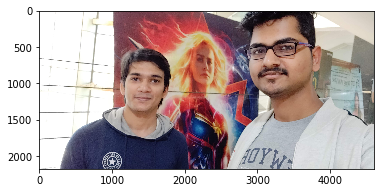

In [16]:
img = cv2.imread('Machine Learning/Image_Segmentation_Using_K-means/buddies.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [17]:
# Flatten the image -> Reshape
allpixels = img.reshape((-1,3))
print(allpixels.shape)

(10027008, 3)


In [18]:
dominant_color = 4
km = KMeans(n_clusters=dominant_color)
km.fit(allpixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
centers = km.cluster_centers_

In [22]:
centers - np.array(centers,dtype='uint8')
print(centers)

[[198.2566712  192.9855262  186.18306372]
 [157.35626973 105.36167617  95.8391425 ]
 [252.39597213 252.34787217 251.00294193]
 [ 48.10827543  38.2394778   60.69634645]]


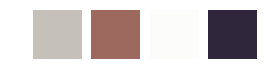

In [25]:
i = 1
plt.figure(0,figsize=(4,2))
colors = []
for each_center  in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_center)
    
    #Color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_center
    plt.imshow(a)
plt.show()

In [28]:
colors

[array([198.2566712 , 192.9855262 , 186.18306372]),
 array([157.35626973, 105.36167617,  95.8391425 ]),
 array([252.39597213, 252.34787217, 251.00294193]),
 array([48.10827543, 38.2394778 , 60.69634645])]

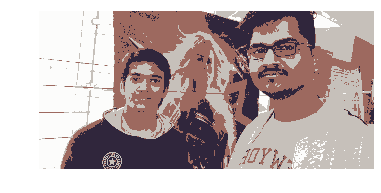

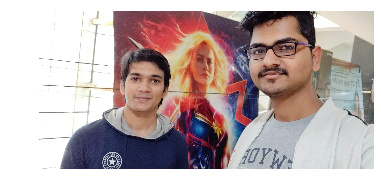

In [31]:
new_img = np.zeros((allpixels.shape),dtype='uint8')

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.axis('off')
plt.show()
plt.imshow(img)
plt.axis('off')
plt.show()